# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data Extraction

Read from **heart_train.csv** into a pandas data frame(call it df)

# Data Visualization

Try viewing the first five rows of your data (Note. try the head function)

In [ ]:
df.head()

,PatientId,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,34,M,ATA,150,214,0,ST,168,N,0.0,Up,0
1,1,59,M,ASY,178,0,1,LVH,120,Y,0.0,Flat,1
2,2,58,M,ASY,115,0,1,Normal,138,N,0.5,Up,1
3,3,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up,1
4,4,52,M,ASY,165,0,1,Normal,122,Y,1.0,Up,1


Let's visualize our data bit and see number of people that have heart disease vs those who dont. In this particular dataset more people have heart disease than those who don't.

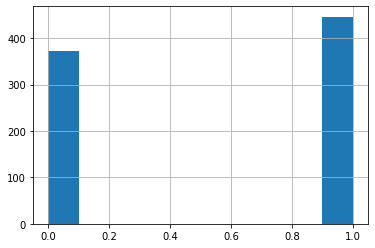

In [ ]:
df['HeartDisease'].hist()

## Data Cleaning/PreProcessing

Before we contiune let us do some preprocessing on our data. Preprocessing is the process a data scientist or ML engineer goes through to make sure the data is clean and ready for the model. One example is checking to see if there are any null values in any of the columns and replacing them.

In [ ]:
df.isnull().values.any()

False

## Feature Engineering

Now Time to do some feature engineering. Extract values from columns you can use as features(hint try to use numerical columns). Store it an variable called X. Note do not use PatientId and remember to use .values to convert it to numpy array.

In [ ]:
X

array([[3.40e+01, 1.50e+02, 2.14e+02, 0.00e+00, 0.00e+00],
       [5.90e+01, 1.78e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       [5.80e+01, 1.15e+02, 0.00e+00, 1.00e+00, 5.00e-01],
       ...,
       [4.70e+01, 1.10e+02, 0.00e+00, 1.00e+00, 2.10e+00],
       [5.70e+01, 1.40e+02, 2.41e+02, 0.00e+00, 2.00e-01],
       [6.10e+01, 1.30e+02, 3.30e+02, 0.00e+00, 0.00e+00]])

Extract your labels in a variable called y (HeartDisease column). Do the same as above.

In [ ]:
y

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

# Data Normalization

We are going to now normalize our data. This will scale our data which will make it easier to train our model and make it more likley for our model to converge on the correct solution. Use the StandardScaler from sklearn to achieve this. Scale only the X variable. Store the result back into X.

In [ ]:
sc = StandardScaler()
# normalize X here

In [ ]:
X

array([[-2.05634489,  0.93656992,  0.1484195 , -0.54627163, -0.82314391],
       [ 0.57834297,  2.43560538, -1.83184956,  1.83059111, -0.82314391],
       [ 0.47295546, -0.93722441, -1.83184956,  1.83059111, -0.35483697],
       ...,
       [-0.6863072 , -1.20490931, -1.83184956,  1.83059111,  1.14374523],
       [ 0.36756795,  0.40120011,  0.39826653, -0.54627163, -0.63582113],
       [ 0.789118  , -0.1341697 ,  1.22183637, -0.54627163, -0.82314391]])

# Train/Test Split

We are now going to split our data between train and test. It is important to do this because we want to reduce the chance of overfitting so we dont want to test on the same data we just trained on. We will use the **train_test_split** function to achieve this. This has already been imported for you. Store the result in variables *X_train, y_train, X_test, y_test*. Use a *80/20* split.

Let us view the shape of the train data. The first number represents how many rows, the second represents how many columns or features.

In [ ]:
X_train.shape

(654, 5)

Let us do the same for the test data.

In [ ]:
X_test.shape

(164, 5)

## Logistic Regression

Let us create a model and fit the model to the train dataset.Let us use the LogisticRegression model from sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression
# clf =

Call the fit function for the classifier on *X_train* and *y_train*.

We are now going to test our model. Call the score function on the classifier and pass in X_test, and y_test. The score you get represents the accuracy of the model e.g| a score of 0.9 means the model is 90% accurate.

# Neural Network

Now let's try the same with a neural network. We will create a small neural network with some hidden layers and an output layer. (Note you are free to design this yourself). The network should output one value (try using sigmoid activation for last layer).

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

Train the model, call the fit function and pass in X_train and y_train.

Let us now test the model. Call the evaluate function and pass in X_test and y_test.

## Test

You are now going to test your model on the hold out test set. There is a file called **heart_test.csv**. You will notice that this file does not have a HeartDisease column. You will have to use your model to make predicitions on the test data. You will then create a file called submission.csv which you will upload to kaggle to see your results.

Read heart_test.csv into a data frame called test_df

Let us view the first five rows.

In [ ]:
test_df.head()

,PatientId,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,818,36,M,NAP,112,340,0,Normal,184,N,1.0,Flat
1,819,63,M,ASY,170,177,0,Normal,84,Y,2.5,Down
2,820,58,M,ASY,114,318,0,ST,140,N,4.4,Down
3,821,64,M,ASY,144,0,0,ST,122,Y,1.0,Flat
4,822,46,M,ASY,118,186,0,Normal,124,N,0.0,Flat


Lets us now extract the same features as we did aboove to test on. You can call it X_new.

We now need to normalize the test data as well. Use the scaler that you created above called sc and call the transform function and pass in X_new. Store the result back into X_new.

In [ ]:
X_new

array([[-1.84556986, -1.09783535,  1.31437231, -0.54627163,  0.11346997],
       [ 0.99989303,  2.00730954, -0.19396347, -0.54627163,  1.51839078],
       [ 0.47295546, -0.99076139,  1.11079325, -0.54627163,  3.29795714],
       [ 1.10528055,  0.61534804, -1.83184956, -0.54627163,  0.11346997],
       [-0.79169472, -0.77661346, -0.11068113, -0.54627163, -0.82314391],
       [ 0.26218043, -0.6695395 , -1.83184956, -0.54627163, -1.75975778],
       [-1.63479483,  0.13351521, -1.83184956,  1.83059111, -0.82314391],
       [ 2.15915569,  0.66888502,  0.16692669,  1.83059111,  0.86276107],
       [-1.63479483, -1.47259421, -1.83184956,  1.83059111,  1.79937494],
       [ 0.0514054 , -0.6695395 ,  0.296477  ,  1.83059111, -0.82314391],
       [ 0.47295546,  0.13351521,  0.22244825, -0.54627163, -0.82314391],
       [ 1.73760564,  1.2577918 ,  0.4352809 , -0.54627163, -0.82314391],
       [ 2.15915569,  0.66888502, -1.83184956,  1.83059111,  0.39445413],
       [ 0.57834297,  0.40120011,  0.6

Call the predict function on X_new to get the predicitons.

The neural network will output probabilties. We must convert those probabilites to 1 or 0. A probability greater than or equal to 0.5 is seen as a 1.Uncomment and run the cell below if the model you chose as your final model is a neural net created using tensorflow.

In [ ]:
# predictions = [1 if p >= 0.5 else 0 for p in predictions.squeeze()]

# Submission
Create a data frame with two columns PatientId and HeartDiesase (Try the pd.DataFrame function). The PatientId column should have the same values as the PatientId column from the test_df dataframe from above and HeartDisease column should be the predicitions you just created. Create a csv file from this data frame (Try using the .to_csv funtion, however make sure to remove indexes so set to the index flag to false). This should created a csv file, this is what you submit to kaggle.